In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Beispielwerte (müssen angepasst werden)
# a = 0.5  # Fokussierte Dingweite in Metern
k = 1.8    # Blendenzahl
f = 0.00474  # Brennweite in Metern
u_prime = 4.5e-6  # Unschärfekreis in Metern

# Entfernungen von 0 bis 1 Meter
distances = np.linspace(0.10, 0.40, 100)

In [22]:
def K(distance):
    return k * (distance - f) * u_prime / f**2


def a_v(distance):
    return distance / (1 + K(distance))


def a_h(distance):
    return distance / (1 - K(distance))


def t(distance):
    return a_h(distance) - a_v(distance)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


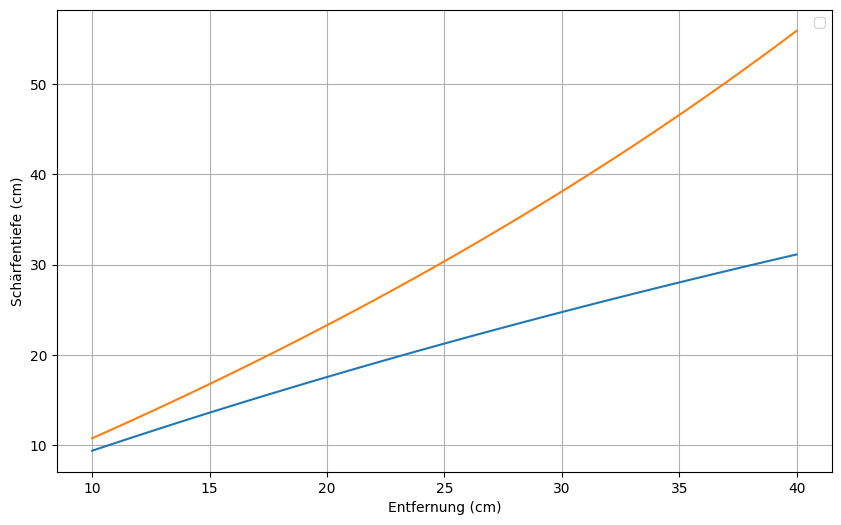

In [25]:

# Plot
plt.figure(figsize=(10, 6))
plt.plot(distances*100, t(distances)*100)  # , label='Schärfentiefe')
plt.xlabel('Entfernung (cm)')
plt.ylabel('Schärfentiefe (cm)')
# plt.title('Schärfentiefe in Abhängigkeit von der Entfernung')
plt.legend()
plt.grid(True)
# plt.savefig('schaerfentiefe_plot.png')  # Speichern als PNG
plt.show()

In [24]:
from sympy.solvers import solve
from sympy import Symbol

0.107402348471767 ( 0.1 - 0.115988199159694 )
0.126141217711475 ( 0.115988199159694 - 0.138242242306629 )
0.153022764386232 ( 0.138242242306629 - 0.171342259234786 )
0.194826350091120 ( 0.171342259234786 - 0.225770326720379 )
0.268747926687065 ( 0.225770326720379 - 0.331935018920754 )
0.434885003643325 ( 0.331935018920754 - 0.630406098014964 )
1.15179763298195 ( 0.630406098014964 - 6.66058030422438 )
-1.74562994718820 ( 6.66058030422438 - -0.771691117744778 )
-0.494117437240482 ( -0.771691117744778 - -0.363403059053906 )
-0.286967631246051 ( -0.363403059053906 - -0.237098203452678 )
-0.201790408313631 ( -0.237098203452678 - -0.175635424816220 )
-0.155360339119229 ( -0.175635424816220 - -0.139281854196168 )
-0.126138088344214 ( -0.139281854196168 - -0.115261114396619 )
-0.106053337447620 ( -0.115261114396619 - -0.0982078793146076 )
-0.0914000448866504 ( -0.0982078793146076 - -0.0854748709281938 )


0.107402348471767 ( 0.1 - 0.115988199159694 )
0.126141217711475 ( 0.115988199159694 - 0.138242242306629 )
0.153022764386232 ( 0.138242242306629 - 0.171342259234786 )
0.194826350091120 ( 0.171342259234786 - 0.225770326720379 )
0.268747926687065 ( 0.225770326720379 - 0.331935018920754 )
0.434885003643325 ( 0.331935018920754 - 0.630406098014964 )
1.15179763298195 ( 0.630406098014964 - 6.66058030422438 )
-1.74562994718820 ( 6.66058030422438 - -0.771691117744778 )


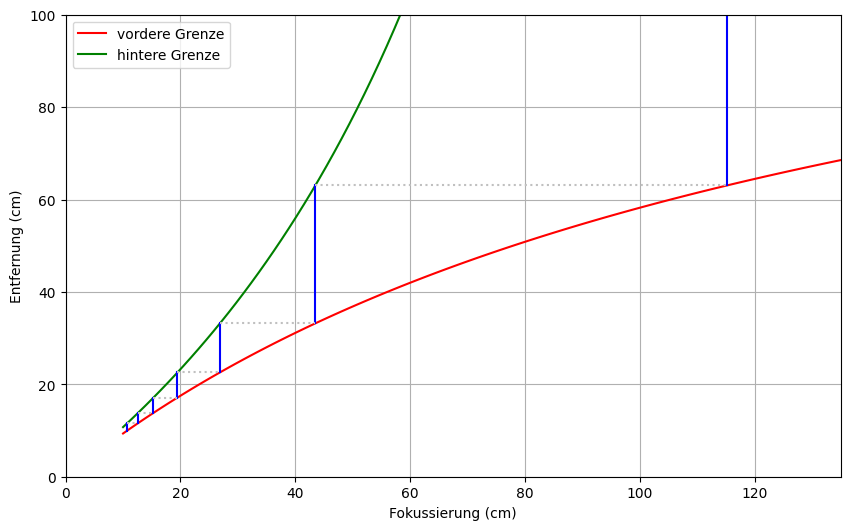

In [62]:
distances = np.linspace(0.10, 1.4, 100)
# Plot
plt.figure(figsize=(10, 6))
plt.xlim(0, 135)
plt.ylim(0, 100)
plt.plot(distances*100, a_v(distances)*100, label='vordere Grenze', color='r')
plt.plot(distances*100, a_h(distances)*100, label='hintere Grenze', color='g')
plt.xlabel('Fokussierung (cm)')
plt.ylabel('Entfernung (cm)')
# plt.title('Schärfentiefe in Abhängigkeit von der Entfernung')
plt.legend()
plt.grid(True)

x = Symbol('x')

d = 0.1
e_old = None
ax = plt.subplot(111)
while d > 0:
    e = solve(a_v(x)-d, x)[0]
    d_old = d
    d = a_h(e)
    print(e, '(', d_old, '-', d, ')')
    plt.axvline(x=e*100, ymin=d_old, ymax=d, color='b', linestyle='-')
    if e_old:
        plt.axhline(y=d_old*100, xmin=e_old/1.35, xmax=e/1.35,
                    color='silver', linestyle='dotted')
    e_old = e


plt.savefig('fokusstack_plot.png')  # Speichern als PNG
plt.show()